# Machine Learning Lab

This lab is aimed to walk you through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis (EDA), model training and model evaluation/comparison. 

You will work with your machine project teamates for this lab and your team needs to decide whether to use either R or Python as the main programming language. **Each team memeber needs to work on his/her own submission.**


## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import datetime
import calendar

In [2]:
orders = pd.read_csv('Orders.csv')
pd.set_option('display.max_columns', 50)
orders.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
17226,15030,ES-2013-DW135858-41546,9/29/13,10/4/13,Second Class,DW-135858,Dorothy Wardle,Corporate,NaN,Vienna,Vienna,Austria,Western Europe,Europe,OFF-AR-3543,Office Supplies,Art,"Boston Pencil Sharpener, Easy-Erase",$181.26,6,0.0,$28.98,16.010,Medium
13082,5839,US-2014-KB1640555-41964,11/21/14,11/25/14,Standard Class,KB-1640555,Katrina Bavinger,Home Office,NaN,Tegucigalpa,Francisco Morazán,Honduras,Central America,LATAM,FUR-BO-4862,Furniture,Bookcases,"Ikea Library with Doors, Pine",$291.79,2,0.4,-$165.37,23.783,Medium
7686,34976,CA-2013-BT11680140-41464,7/9/13,7/14/13,Standard Class,BT-116801406,Brian Thompson,Consumer,20735.0,Clinton,Maryland,United States,Eastern US,USCA,FUR-FU-4038,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,$181.96,2,0.0,$20.02,14.120,Medium
35171,20515,IN-2014-CR1262527-41782,5/23/14,5/27/14,Standard Class,CR-1262527,Corey Roper,Home Office,NaN,Leshan,Sichuan,China,Eastern Asia,Asia Pacific,OFF-PA-4481,Office Supplies,Paper,"Green Bar Parchment Paper, 8.5 x 11",$145.74,7,0.0,$56.70,3.530,Medium
48750,37066,CA-2013-SS20875140-41329,2/24/13,3/1/13,Standard Class,SS-208751406,Sung Shariari,Consumer,1453.0,Leominster,Massachusetts,United States,Eastern US,USCA,OFF-PA-3010,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,$22.72,4,0.0,$10.22,1.690,Medium
458,44182,GG-2013-SG1047047-41405,5/11/13,5/13/13,Second Class,SG-1047047,Sheri Gordon,Consumer,NaN,Tbilisi,Tbilisi,Georgia,Western Asia,Asia Pacific,TEC-CO-3597,Technology,Copiers,"Brother Fax Machine, High-Speed","$1,900.44",6,0.0,$417.96,303.450,High
17797,47698,SG-2012-TC11295111-40953,2/14/12,2/18/12,Second Class,TC-11295111,Toby Carlisle,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,OFF-EN-4445,Office Supplies,Envelopes,"GlobeWeis Mailers, Set of 50",$77.10,2,0.0,$0.72,15.230,High
41218,18362,ES-2015-CS12460139-42248,9/1/15,9/5/15,Standard Class,CS-12460139,Chuck Sachs,Consumer,NaN,Manchester,England,United Kingdom,Northern Europe,Europe,OFF-BI-3248,Office Supplies,Binders,"Avery Binder Covers, Economy",$33.21,3,0.0,$10.26,2.020,Medium
24503,11547,ES-2015-PO18850139-42264,9/17/15,9/22/15,Standard Class,PO-18850139,Patrick O'Brill,Consumer,NaN,Solihull,England,United Kingdom,Northern Europe,Europe,OFF-ST-5706,Office Supplies,Storage,"Rogers Shelving, Industrial",$125.22,2,0.0,$37.56,8.550,Medium
13133,32115,CA-2012-CA12775140-41087,6/27/12,7/1/12,Standard Class,CA-127751406,Cynthia Arntzen,Consumer,19140.0,Philadelphia,Pennsylvania,United States,Eastern US,USCA,OFF-BI-5979,Office Supplies,Binders,Self-Adhesive Ring Binder Labels,$3.17,3,0.7,-$2.43,1.240,High


In [3]:
orders.shape

(51290, 24)

In [4]:
list(orders)

['Row.ID',
 'Order.ID',
 'Order.Date',
 'Ship.Date',
 'Ship.Mode',
 'Customer.ID',
 'Customer.Name',
 'Segment',
 'Postal.Code',
 'City',
 'State',
 'Country',
 'Region',
 'Market',
 'Product.ID',
 'Category',
 'Sub.Category',
 'Product.Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping.Cost',
 'Order.Priority']

In [5]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [6]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


In [7]:
orders.Profit = pd.to_numeric(orders.Profit.apply(lambda s: s.replace("$", "").replace(",", "")))

In [8]:
orders.Sales = pd.to_numeric(orders.Sales.apply(lambda s: s.replace("$", "").replace(",", "")))

In [9]:
orders.describe()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490685,3.476545,0.142908,28.610970,26.478567
std,14806.29199,32063.693350,487.565388,2.278766,0.212280,174.341066,57.251373
min,1.00000,1040.000000,0.440000,1.000000,0.000000,-6599.980000,1.002000
25%,12823.25000,23223.000000,30.762500,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.055000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.055000,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000


In [10]:
print(orders["Profit"].dtypes)
print(orders["Sales"].dtypes)

float64
float64


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


In [11]:
print(orders["Order.Date"].dtypes)

object


In [12]:
orders["Order.Date"] = orders["Order.Date"].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))
print(orders["Order.Date"].dtypes)

datetime64[ns]


In [13]:
orders["Month"] = orders["Order.Date"].apply(lambda x: x.month)
orders["Year"] = orders["Order.Date"].apply(lambda x: x.year)
orders["MY"] = orders["Month"].map(str) + "/" + orders["Year"].map(str)

In [14]:
orders["MY"] = orders["MY"].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y').date())

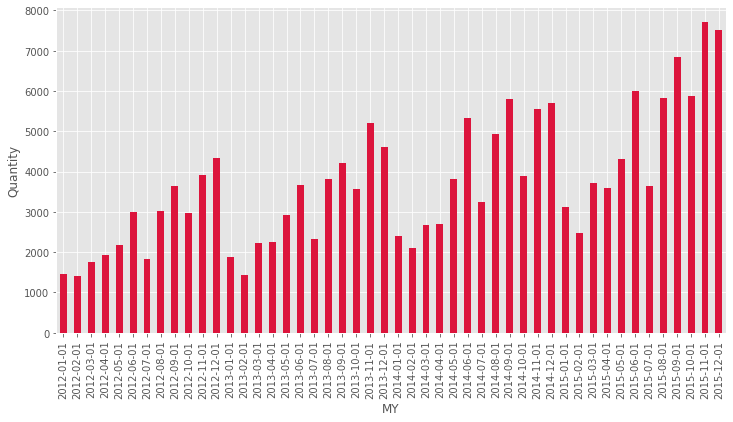

In [15]:
plt.figure(figsize=(12,6))
orders.groupby('MY')['Quantity'].sum().plot.bar(color = "crimson")
plt.ylabel("Quantity")
plt.show()

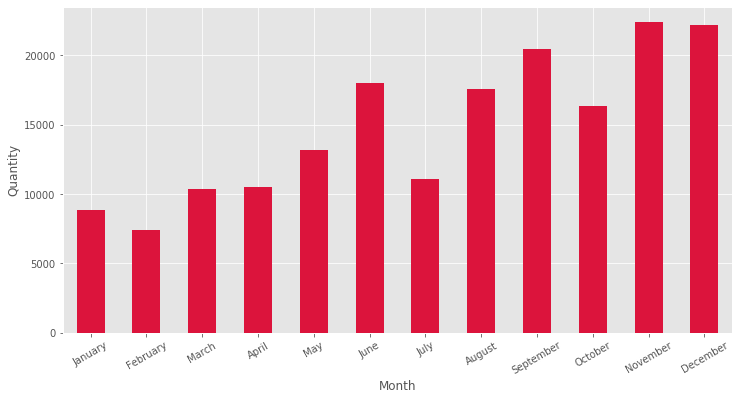

In [16]:
plt.figure(figsize=(12,6))
orders.groupby('Month')['Quantity'].sum().plot.bar(color = "crimson")
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=30)
plt.ylabel("Quantity")
plt.show()

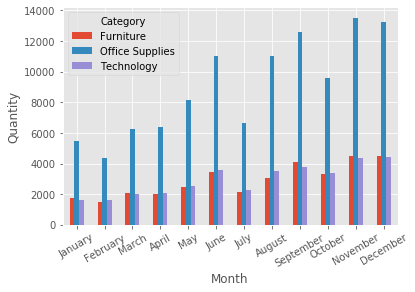

In [17]:
orders.groupby(['Month','Category'])['Quantity'].sum().unstack().plot.bar()
plt.ylabel("Quantity")
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation = 30)
plt.show()

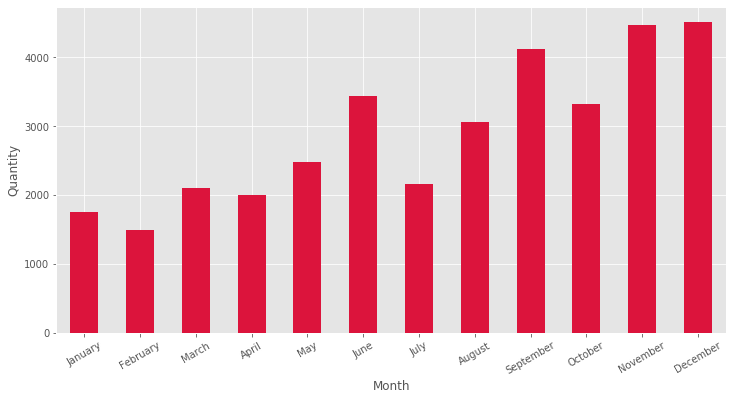

In [18]:
plt.figure(figsize=(12,6))
orders.loc[orders["Category"] == "Furniture"].groupby(['Month'])['Quantity'].sum().plot.bar(color = "crimson")
plt.ylabel("Quantity")
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation = 30)
plt.show()

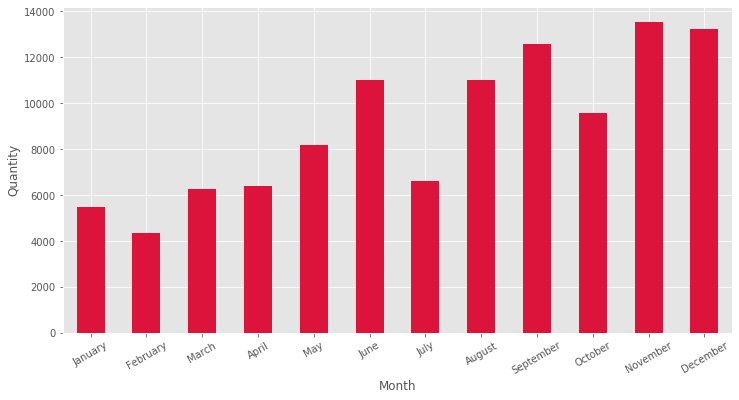

In [19]:
plt.figure(figsize=(12,6))
orders.loc[orders["Category"] == "Office Supplies"].groupby(['Month'])['Quantity'].sum().plot.bar(color = "crimson")
plt.ylabel("Quantity")
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation = 30)
plt.show()

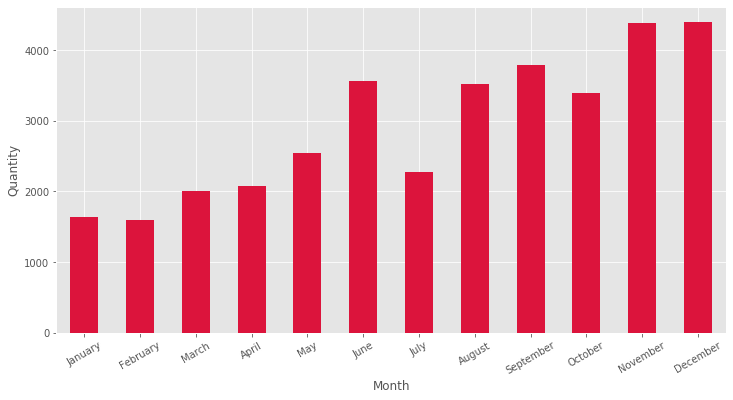

In [20]:
plt.figure(figsize=(12,6))
orders.loc[orders["Category"] == "Technology"].groupby(['Month'])['Quantity'].sum().plot.bar(color = "crimson")
plt.ylabel("Quantity")
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation = 30)
plt.show()


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.
<br>

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


In [21]:
returns = pd.read_csv('Returns.csv')
returns.sample(10)

,Returned,Order ID,Region
1055,Yes,ES-2015-WB21850139-42248,Northern Europe
940,Yes,IR-2012-SS1051560-41125,Southern Asia
347,Yes,ES-2014-DV1346564-41961,Southern Europe
886,Yes,IN-2013-KM1666059-41574,Southeastern Asia
269,Yes,MX-2014-SW2075582-41811,Central America
275,Yes,US-2012-JP155205-41153,South America
301,Yes,BU-2014-CS186019-41993,Eastern Europe
631,Yes,US-2014-PK19075140-41907,Eastern US
3,Yes,IN-2015-JH158207-42140,Oceania
532,Yes,SF-2015-RS9765117-42224,Southern Africa


In [22]:
df_raw = pd.merge(orders, returns, how = "left", left_on = "Order.ID", right_on = "Order ID").drop(["Order ID", "Region_y"], axis = 1)
df_raw["Returned"] = df_raw["Returned"].fillna(value = "No")
df_raw.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,MY,Returned
1759,6712,MX-2012-GT1471039-40975,2012-03-07,3/12/12,Standard Class,GT-1471039,Greg Tran,Consumer,NaN,San Salvador,San Salvador,El Salvador,Central America,LATAM,FUR-CH-4532,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, Red",2855.16,9,0.0,1313.28,145.495,Medium,3,2012,2012-03-01,No
20507,1580,US-2013-PO1886536-41619,2013-12-11,12/17/13,Standard Class,PO-1886536,Patrick O'Donnell,Consumer,NaN,Santiago de los Caballeros,Santiago,Dominican Republic,Caribbean,LATAM,FUR-BO-3634,Furniture,Bookcases,"Bush Floating Shelf Set, Metal",136.58,2,0.4,-20.50,11.965,Medium,12,2013,2013-12-01,No
7004,24297,ID-2014-TH2155066-41915,2014-10-03,10/7/14,Standard Class,TH-2155066,Tracy Hopkins,Home Office,NaN,Hamamatsu,Shizuoka,Japan,Eastern Asia,Asia Pacific,OFF-AR-6127,Office Supplies,Art,"Stanley Sketch Pad, Fluorescent",319.83,7,0.0,131.04,48.860,High,10,2014,2014-10-01,No
29310,17270,ES-2013-VM21835139-41418,2013-05-24,5/30/13,Standard Class,VM-21835139,Vivian Mathis,Consumer,NaN,Coventry,England,United Kingdom,Northern Europe,Europe,OFF-ST-4096,Office Supplies,Storage,"Eldon Shelving, Single Width",96.90,2,0.0,0.00,5.830,Medium,5,2013,2013-05-01,No
18348,40646,CA-2014-DN13690140-41996,2014-12-23,12/29/14,Standard Class,DN-136901404,Duane Noonan,Consumer,92553.0,Moreno Valley,California,United States,Western US,USCA,FUR-FU-5165,Furniture,Furnishings,Magnifier Swing Arm Lamp,41.96,2,0.0,10.91,2.160,Medium,12,2014,2014-12-01,No
30951,3394,US-2014-NB1858098-41909,2014-09-27,10/1/14,Standard Class,NB-1858098,Nicole Brennan,Corporate,NaN,Panama City,Panama,Panama,Central America,LATAM,TEC-AC-3388,Technology,Accessories,"Belkin Memory Card, Bluetooth",137.77,3,0.4,-48.23,5.088,Medium,9,2014,2014-09-01,No
15241,14117,ES-2014-RA1991534-41842,2014-07-22,7/26/14,Standard Class,RA-1991534,Russell Applegate,Consumer,NaN,Odense,South Denmark,Denmark,Northern Europe,Europe,OFF-SU-4138,Office Supplies,Supplies,"Elite Trimmer, Steel",102.68,5,0.5,-2.18,19.280,High,7,2014,2014-07-01,No
10773,38015,CA-2014-CK12325140-41738,2014-04-09,4/16/14,Standard Class,CK-123251408,Christine Kargatis,Home Office,71901.0,Hot Springs,Arkansas,United States,Southern US,USCA,FUR-FU-4090,Furniture,Furnishings,Eldon Radial Chair Mat for Low to Medium Pile ...,159.92,4,0.0,31.98,17.930,Low,4,2014,2014-04-01,No
50107,48946,BU-2014-TT1122019-41840,2014-07-20,7/27/14,Standard Class,TT-1122019,Thomas Thornton,Consumer,NaN,Sliven,Sliven,Bulgaria,Eastern Europe,Europe,OFF-BI-2912,Office Supplies,Binders,"Acco Hole Reinforcements, Clear",6.12,1,0.0,0.24,1.190,Medium,7,2014,2014-07-01,No
27647,43092,NI-2012-Co264095-41144,2012-08-23,8/28/12,Standard Class,Co-264095,Corey-Lock,Consumer,NaN,Lagos,Lagos,Nigeria,Western Africa,Africa,OFF-AR-3547,Office Supplies,Art,"Boston Pens, Easy-Erase",60.86,14,0.7,-75.22,6.640,Medium,8,2012,2012-08-01,No


	1. How much profit did we lose due to returns each year?

In [23]:
df_raw[df_raw["Returned"] == "Yes"].groupby("Year")["Profit"].sum()

Year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64


	2. How many customer returned more than once? more than 5 times?

In [24]:
df_customer = df_raw[df_raw["Returned"] == "Yes"].groupby("Customer.ID")["Quantity"].count().reset_index()
print("More than once:", sum(df_customer["Quantity"] > 1))
print("More than 5 times:", sum(df_customer["Quantity"] > 5))

More than once: 547
More than 5 times: 46


	3. Which regions are more likely to return orders?

In [25]:
df_raw.groupby(["Region_x"]).Returned.value_counts(normalize = True).unstack().drop("No", axis = 1).Yes.sort_values(
    ascending = False).reset_index().style.format({"Yes": "{:,.2%}".format})


,Region_x,Yes
0,Western US,5.53%
1,Eastern Asia,5.52%
2,Southern Europe,5.30%
3,Southern Africa,5.23%
4,Southern US,5.12%
5,Eastern US,4.71%
6,Southeastern Asia,4.47%
7,South America,4.45%
8,Western Asia,4.43%
9,Oceania,4.42%


In [26]:
df_raw.groupby(["Region_x", "Returned"]).size().unstack().sort_values(by  = "Yes", ascending = False).head()

Returned,No,Yes
Region_x,,
Central America,5368,248
Western Europe,5650,233
Western US,3026,177
Oceania,3333,154
Southeastern Asia,2989,140


	4. Which categories (sub-categories) of products are more likely to be returned?

In [27]:
df_raw.groupby("Category").Returned.value_counts(normalize = True).unstack().drop(
    "No", axis = 1).sort_values(by = "Yes", ascending = False).style.format({
    'Yes': '{:,.2%}'.format})

Returned,Yes
Category,
Technology,4.39%
Furniture,4.33%
Office Supplies,4.31%


In [28]:
df_raw.groupby("Sub.Category").Returned.value_counts(normalize = True).unstack().drop("No", axis = 1).sort_values(
    by = "Yes", ascending = False).style.format({"Yes": "{:,.2%}".format})

Returned,Yes
Sub.Category,
Labels,5.27%
Tables,4.76%
Accessories,4.49%
Art,4.46%
Copiers,4.45%
Binders,4.38%
Phones,4.32%
Bookcases,4.31%
Paper,4.30%


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [29]:
df_raw.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,MY,Returned
50439,49009,NI-2013-BF97595-41303,2013-01-29,2/2/13,Standard Class,BF-97595,Barbara Fisher,Corporate,NaN,Zaria,Kaduna,Nigeria,Western Africa,Africa,OFF-LA-5382,Office Supplies,Labels,"Novimex File Folder Labels, 5000 Label Set",2.59,1,0.700,-2.69,1.150,Medium,1,2013,2013-01-01,No
37202,9058,US-2014-BP1129098-41870,2014-08-19,8/22/14,Second Class,BP-1129098,Beth Paige,Consumer,NaN,Panama City,Panama,Panama,Central America,LATAM,OFF-LA-6051,Office Supplies,Labels,"Smead Removable Labels, Adjustable",21.78,5,0.400,-2.62,2.952,High,8,2014,2014-08-01,No
32149,13458,IT-2012-AI10855120-41264,2012-12-21,12/25/12,Standard Class,AI-10855120,Arianne Irving,Consumer,NaN,Elda,Valenciana,Spain,Southern Europe,Europe,TEC-PH-5827,Technology,Phones,"Samsung Headset, with Caller ID",131.76,2,0.100,-7.32,4.590,Medium,12,2012,2012-12-01,No
31490,22775,ID-2012-MP1796559-40936,2012-01-28,1/31/12,First Class,MP-1796559,Michael Paige,Corporate,NaN,Semarang,Jawa Tengah,Indonesia,Southeastern Asia,Asia Pacific,OFF-SU-4976,Office Supplies,Supplies,"Kleencut Box Cutter, Steel",90.23,5,0.470,-51.22,4.860,Medium,1,2012,2012-01-01,No
7132,2783,MX-2015-JC1610518-42185,2015-06-30,7/4/15,Standard Class,JC-1610518,Julie Creighton,Corporate,NaN,Betim,Minas Gerais,Brazil,South America,LATAM,TEC-CO-3687,Technology,Copiers,"Canon Fax Machine, Digital",634.79,3,0.002,62.33,47.902,Medium,6,2015,2015-06-01,No
37295,12193,IT-2014-MC1784564-41646,2014-01-07,1/10/14,First Class,MC-1784564,Michael Chen,Consumer,NaN,Battipaglia,Campania,Italy,Southern Europe,Europe,FUR-CH-5371,Furniture,Chairs,"Novimex Chairmat, Black",21.56,1,0.600,-20.50,2.930,Medium,1,2014,2014-01-01,No
20079,33422,CA-2015-EH14005140-42340,2015-12-02,12/6/15,Standard Class,EH-140051406,Erica Hernandez,Home Office,19143.0,Philadelphia,Pennsylvania,United States,Eastern US,USCA,TEC-PH-3406,Technology,Phones,"Belkin SportFit Armband For iPhone 5s/5c, Fuchsia",62.96,7,0.400,9.44,1.620,Medium,12,2015,2015-12-01,No
1769,8610,MX-2015-TB2135518-42270,2015-09-23,9/25/15,First Class,TB-2135518,Todd Boyes,Corporate,NaN,Patrocínio,Minas Gerais,Brazil,South America,LATAM,FUR-BO-5798,Furniture,Bookcases,"Safco Stackable Bookrack, Pine",601.32,6,0.000,246.48,145.065,High,9,2015,2015-09-01,No
47528,21627,ID-2015-Dl1360059-42258,2015-09-11,9/15/15,Standard Class,Dl-1360059,Dorris liebe,Corporate,NaN,Surabaya,Jawa Timur,Indonesia,Southeastern Asia,Asia Pacific,OFF-FA-3046,Office Supplies,Fasteners,"Advantus Paper Clips, Metal",21.27,3,0.470,-3.30,1.430,Medium,9,2015,2015-09-01,No
31244,40138,US-2014-JR16210140-41679,2014-02-09,2/13/14,Standard Class,JR-162101404,Justin Ritter,Corporate,94110.0,San Francisco,California,United States,Western US,USCA,TEC-AC-5094,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,89.97,3,0.000,39.59,5.970,Medium,2,2014,2014-02-01,No


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [30]:
print(df_raw["Ship.Date"].dtypes)
print(df_raw["Order.Date"].dtypes)

object
datetime64[ns]


In [31]:
df_raw["Ship.Date"] = df_raw["Ship.Date"].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))

In [32]:
print(df_raw["Ship.Date"].dtypes)

datetime64[ns]


In [33]:
df_raw["Process.Time"] = df_raw["Ship.Date"] - df_raw["Order.Date"]
df_raw

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,MY,Returned,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,11,2014,2014-11-01,No,2 days
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,2,2014,2014-02-01,No,2 days
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,10,2014,2014-10-01,No,1 days
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,1,2014,2014-01-01,No,2 days
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,11,2014,2014-11-01,No,1 days
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,Australia,Oceania,Asia Pacific,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.10,763.28,897.350,Critical,6,2014,2014-06-01,No,3 days
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,New Zealand,Oceania,Asia Pacific,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.00,564.84,894.770,Critical,11,2012,2012-11-01,No,2 days
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,Waikato,New Zealand,Oceania,Asia Pacific,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.00,996.48,878.380,High,4,2013,2013-04-01,No,4 days
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.00,54.71,25.270,High,11,2014,2014-11-01,No,2 days
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,United States,Western US,USCA,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.20,5.48,11.130,High,3,2012,2012-03-01,No,1 days


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [34]:
df_raw.groupby(["Product.ID", "Returned"]).size().unstack().fillna(value = 0)

Returned,No,Yes
Product.ID,,
FUR-BO-3174,2.0,0.0
FUR-BO-3175,8.0,0.0
FUR-BO-3176,5.0,1.0
FUR-BO-3177,8.0,0.0
FUR-BO-3409,8.0,0.0
FUR-BO-3615,15.0,1.0
FUR-BO-3616,19.0,1.0
FUR-BO-3617,12.0,0.0
FUR-BO-3618,19.0,0.0


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.